First attempt at working end to end - from Hands-On Machine Learning, but using different dataset.

In [60]:
# Libraries
import os
from six.moves import urllib
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Import data

In [30]:
dataset_dir = "data/first_go"

def fetch_data(data_url, data_dir, data_filename):
    if not os.path.isdir(data_dir):
        os.makedirs(data_dir)
    full_dir = os.path.join(dataset_dir, data_filename)
    urllib.request.urlretrieve(data_url, full_dir)

In [31]:
# 2016 Census mesh block counts
meshblock_url = "https://www.abs.gov.au/AUSSTATS/subscriber.nsf/log?openagent&2016%20census%20mesh%20block%20counts.csv&2074.0&Data%20Cubes&1DED88080198D6C6CA2581520083D113&0&2016&04.07.2017&Latest"
meshblock_filename = "meshblock_counts.csv"

fetch_data(meshblock_url, dataset_dir, meshblock_filename)

In [43]:
# Load data
def load_data(data_dir, data_filename):
    csv_path = os.path.join(data_dir, data_filename)
    return pd.read_csv(csv_path, encoding='cp1252', low_memory=False)

In [79]:
df = load_data(dataset_dir, meshblock_filename)
# Drop last row because it's the copyright row
df = df[:-1]
df.head()

,MB_CODE_2016,MB_CATEGORY_NAME_2016,AREA_ALBERS_SQKM,Dwelling,Person,State
0,10000009499,NOUSUALRESIDENCE,0.0000,NaN,12288.0,1.0
1,10000010000,Residential,0.0209,42.0,69.0,1.0
2,10000021000,Commercial,0.0829,0.0,0.0,1.0
3,10000022000,Commercial,0.0388,3.0,5.0,1.0
4,10000023000,Commercial,0.0254,4.0,11.0,1.0


# Looking at data structure

In [48]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 358127 entries, 0 to 358126
Data columns (total 6 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   MB_CODE_2016           358124 non-null  object 
 1   MB_CATEGORY_NAME_2016  358122 non-null  object 
 2   AREA_ALBERS_SQKM       358122 non-null  float64
 3   Dwelling               358113 non-null  float64
 4   Person                 358122 non-null  float64
 5   State                  358122 non-null  float64
dtypes: float64(4), object(2)
memory usage: 16.4+ MB


In [54]:
# Fix up types
df["State"] = df["State"].astype('category')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 358127 entries, 0 to 358126
Data columns (total 6 columns):
 #   Column                 Non-Null Count   Dtype   
---  ------                 --------------   -----   
 0   MB_CODE_2016           358124 non-null  object  
 1   MB_CATEGORY_NAME_2016  358122 non-null  object  
 2   AREA_ALBERS_SQKM       358122 non-null  float64 
 3   Dwelling               358113 non-null  float64 
 4   Person                 358122 non-null  float64 
 5   State                  358122 non-null  category
dtypes: category(1), float64(3), object(2)
memory usage: 14.0+ MB


In [55]:
# See descriptives
df["State"].value_counts()

1.0    109880
2.0     85014
3.0     69764
5.0     42449
4.0     28205
6.0     12981
8.0      6393
7.0      3299
9.0       137
Name: State, dtype: int64

In [56]:
df.describe()

,AREA_ALBERS_SQKM,Dwelling,Person
count,358122.000000,358113.000000,358122.000000
mean,21.467896,27.682427,65.335252
std,681.434385,26.446532,71.714688
min,0.000000,0.000000,0.000000
25%,0.021700,0.000000,3.000000
50%,0.037900,30.000000,65.000000
75%,0.086500,42.000000,102.000000
max,165570.518000,1923.000000,12510.000000


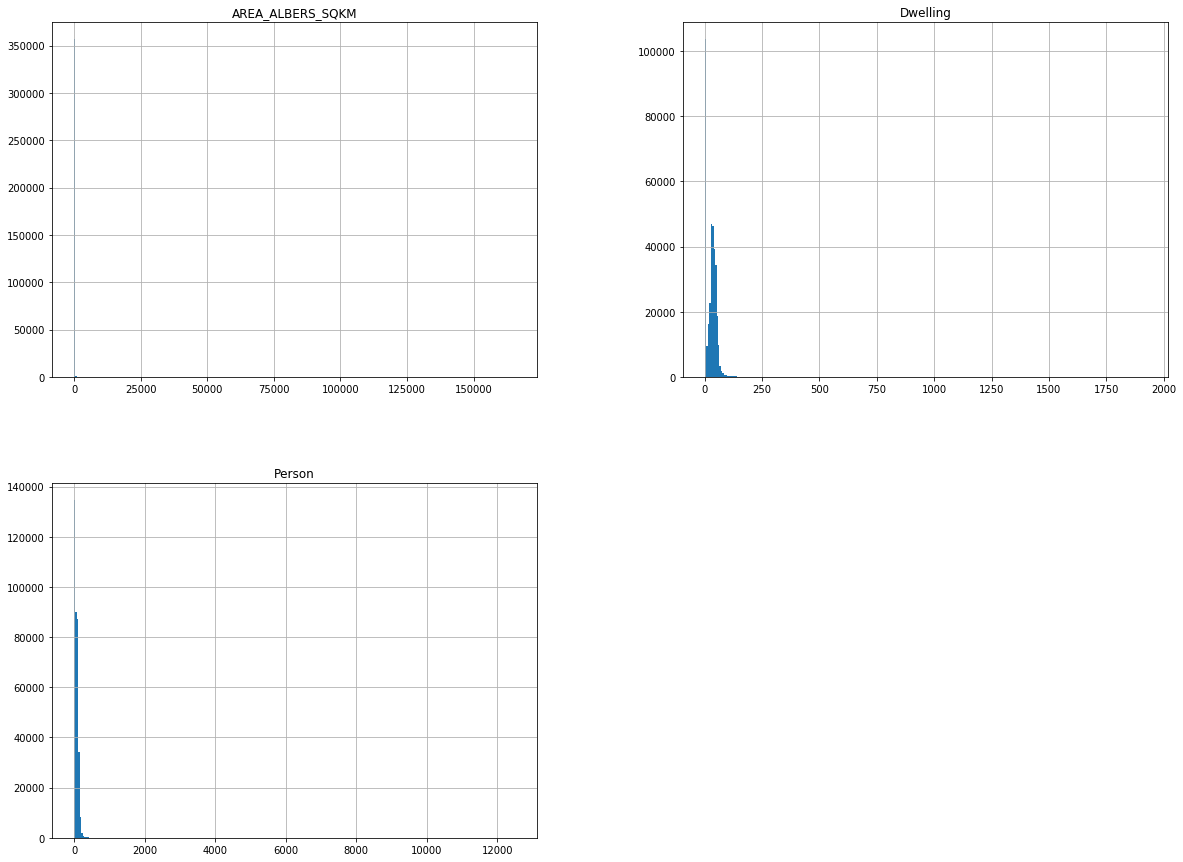

In [67]:
# plotting distribtuion
df.hist(bins=300, figsize=(20, 15))
plt.show() # Optional in jupyter as it'll auto display plots when cell is executed

# Create test set

Want to avoid data snooping bias, so create test set first.

Next time use scikit learn.... it'll be faster.

In [119]:
def split_test_train(data, test_ratio):
    shuffled_indicies = np.random.permutation(len(data))
    test_set_size = int(len(data) * test_ratio)
    test_indicies = shuffled_indicies[:test_set_size] # Start till test_set_size
    train_indicies = shuffled_indicies[test_set_size:] # From test_set_size till end
    return data.iloc[test_indicies], data.iloc[train_indicies]

# iloc is property - the indexing starts at 0. Seems you can't use it for columns alone
# e.g. df.iloc[, 1] doesn't work.    

In [125]:
# Set seet
np.random.seed(42)
test_set, train_set = split_test_train(df, 0.2)
test_set.head()

,MB_CODE_2016,MB_CATEGORY_NAME_2016,AREA_ALBERS_SQKM,Dwelling,Person,State
169388,20575802000,Industrial,0.1397,0.0,3.0,2.0
59682,10635821000,Other,5.5613,0.0,0.0,1.0
144968,20341850000,Residential,0.0290,37.0,54.0,2.0
269661,40049590000,Primary Production,448.7433,29.0,58.0,4.0
338063,60030830000,Parkland,0.0063,0.0,0.0,6.0


## Looking for correlations

In [126]:
df.corr()

,AREA_ALBERS_SQKM,Dwelling,Person,State
AREA_ALBERS_SQKM,1.000000,-0.007929,-0.004413,0.029330
Dwelling,-0.007929,1.000000,0.862356,-0.054033
Person,-0.004413,0.862356,1.000000,-0.065057
State,0.029330,-0.054033,-0.065057,1.000000
